# Kmeans Clustering QUIZ

### 퀴즈 
- 12:05~12:55 (1시간)
- 접근 가능한 곳
  - https://scikit-learn.org
  - https://docs.scipy.org/doc/numpy/reference/
- 100점만점 (가산점 20점)
  - 가산점은 앞으로 진행될 퀴즈에서 감점 사항을 보상받는 구조

### 퀴즈의 목적
- Kmeans_Lloyd 와 Kmeans++ 결과를 통해 Kmeans 초기화의 중요성을 확인한다.

### 사용데이터
- sklearn digits 데이터 셋 (K=10)

### 구현 함수
- Kmeans_Lloyd (40점)
  - Random 초기화를 이용하여 kmeans를 직접 구현한다.
  - 도저히 직접 구현하기 힘들어 라이브러리 이용시 5점 인정 
- Kmeans_Plus (20점)
  - Kmeans++ 방법으로 초기화한다.
  - sklearn의 kmeans를 wrapping 해도 좋다.
  - 라이브러리 이용 없이 직접구현시 가산점 있음 (20점)

### 실험 결과
- Center(K=10) 를 시각화한다.(10점)
- Accuracy를 측정한다.(10점)
- Confusion Matrix 를 보여준다.(10점)

- Accuracy가 상식적인 범위 내(70%이상)로 출력되고 위의 3가지 실험을 모두 완료할 경우 (10점)

### 제출
- 파일 => .ipynb 다운로드 => 이메일 보내기
- ykchoi@sejong.ac.kr


In [0]:
### ===============================================
### 추가적으로 필요한 패키지는 이쪽에 정의하세요
### ===============================================

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np




## 데이터 로더

In [0]:
# 수정 필요 없음, 그러나 필요시 수정 가능

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target


digits.data.shape

(1797, 64)

## Kmeans 알고리즘 작성
- Kmeans_Lloyd (40점)
- Kmeans_Plus (20점)

In [0]:
from sklearn.metrics import pairwise_distances_argmin

def kmeans_Lloyd(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


from sklearn.cluster import KMeans
def kmeans_plus(X,n_cluster):

    kmeans = KMeans(n_cluster)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    return centers, labels


    
  
    
# 알고리즘이 정상적으로 작성되었다면 수정할 필요 없음
predict_centers_Lloyd, predict_labels_Lloyd = kmeans_Lloyd(X, 10)
predict_centers_Plus, predict_labels_Plus = kmeans_plus(X, 10)

## Center(K=10) 를 시각화한다.(10점)
- 두 알고리즘 모두

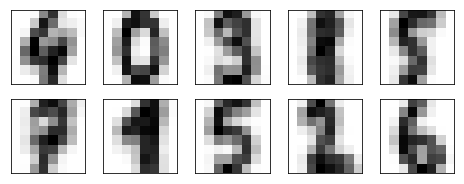

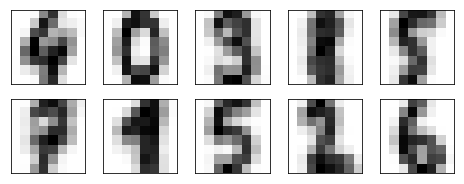

In [0]:


predict_centers_ = predict_centers_Lloyd.reshape(10,8,8)
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, predict_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

    
predict_centers_ = predict_centers_Plus.reshape(10,8,8)
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, predict_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


## Accuracy를 측정한다.(10점)
- 두 알고리즘 모두

In [0]:
## ========================================================================
## kmeans 군집 결과는 실제 레이블에 매칭되지 않는다.
## 학습 된 각 클러스터 레이블을 실제 레이블과 일치시키는 과정이 필요하다.
## ========================================================================
from scipy.stats import mode

labels_Lloyd = np.zeros_like(predict_labels_Lloyd)
for i in range(10):
    mask = (predict_labels_Lloyd == i)
    labels_Lloyd[mask] = mode(digits.target[mask])[0]


## 아래의 코드는 수정할 필요가 없다
from sklearn.metrics import accuracy_score
aa = accuracy_score(Y,labels_Lloyd)
print(aa)


from scipy.stats import mode

labels_Plus = np.zeros_like(predict_labels_Plus)
for i in range(10):
    mask = (predict_labels_Plus == i)
    labels_Plus[mask] = mode(digits.target[mask])[0]


## 아래의 코드는 수정할 필요가 없다
from sklearn.metrics import accuracy_score
aa = accuracy_score(Y,labels_Plus)
print(aa)

0.7456872565386756
0.7918753478018921


## Confusion Matrix 를 보여준다.(10점)
- 두 알고리즘 모두

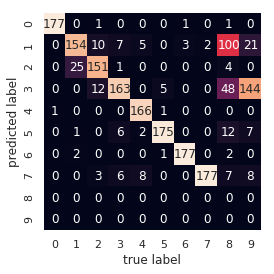

In [0]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y, labels_Lloyd)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');




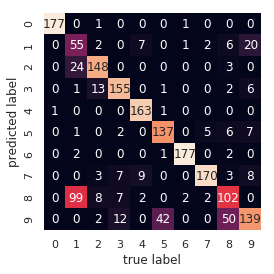

In [0]:


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y, labels_Plus)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');